# Empirical distribution

In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In this notebook we demonstrate how a large sample can be used to form the empirical distribution and how this distribution closely approximates the true distribution. 

The empirical distribution is formed by taking a large sample, which is used to represent the distribution. 
For illustrative purposes, let's assume we know the underlying distribution (which we usually don't) and that it is a normal distribution. 

In [3]:
mu = 3
stddev = 7
normal = stats.norm(mu, stddev)

Let's plot it: 

<Axes: >

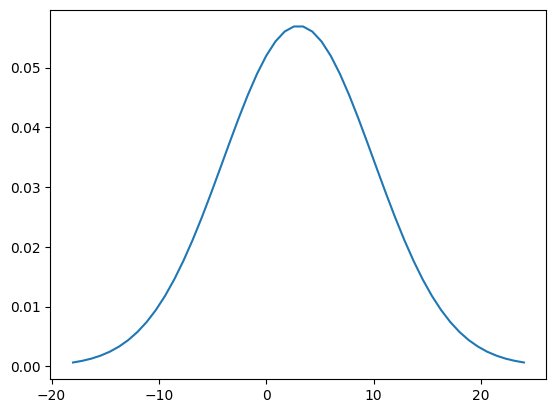

In [4]:
x = np.linspace(mu - 3 * stddev, mu + 3 * stddev)
sns.lineplot(x = x, y = normal.pdf(x))

It's CDF is

<Axes: >

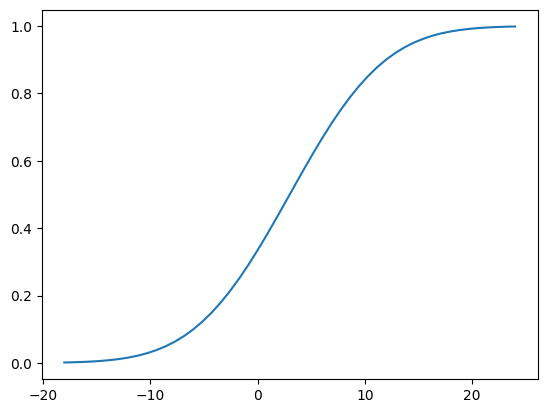

In [5]:
x = np.linspace(mu - 3 * stddev, mu + 3 * stddev)
sns.lineplot(x = x, y = normal.cdf(x))

Let's create samples from this distribution

In [38]:
samples = normal.rvs(100)

The empirical distribution function $F_n$ is defined as the CDF, where $F_n(x)$ is just the fraction of elements in the sample smaller than $x$. The probability that $x$ is smaller than the smallest sample is 0, the probability that it is smaller or equal to the largest is 1. 

We can create this CDF from the samples by just sorting them and assigning each sample a probability of $1/n$. 

In [39]:
sorted_samples=sorted(samples)
cdf_values = np.arange(1, len(sorted_samples)+1) / len(sorted_samples)

Plotting reveals that the cdf follows accurately the theoretical one. 

<Axes: >

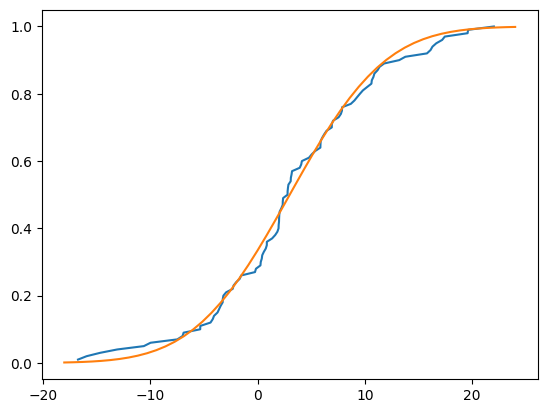

In [40]:
sns.lineplot(x=sorted_samples, y=cdf_values)
sns.lineplot(x = x, y = normal.cdf(x))

As each of the observed samples has probability $1/n$ we can obtain samples from the empirical distribution by simply selecting uniform random values from the samples that represent the empirical distribution:

In [27]:
def sample_emp(m):
    idcs = np.random.randint(0, len(sorted_samples), size=m)
    return [sorted_samples[idx] for idx in idcs]

Let's draw some samples and show a histogram. The histogram should be similar to the density that we initially samples from. 

<Axes: ylabel='Density'>

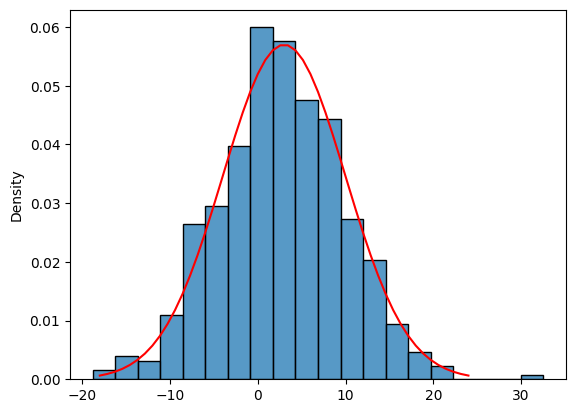

In [28]:
emp_samples = sample_emp(500)
sns.histplot(x = emp_samples, stat="density", bins =20)
sns.lineplot(x = x, y = normal.pdf(x), color='red')

## Bootstrap method

The empirical distribution plays an important role in the boostrap method. The idea behind the bootstrap method is that, if we have any large enough sample from a distribution, its empirical distribution resembles the (unkonwn) distribution it was generated from closely. As we know how to sample from this empirical distribution, we can generate new samples from the empirical distribution and use them to compute parameters of interest. 

We demonstrate this in the following. We use as the (in reality unkown) base distribution, from which we generate the inital sample, an exponential distribution. 


In [29]:
rate = 1
dist = stats.expon(rate)
samples = dist.rvs(1000)
xs = np.linspace(1, rate * 5)

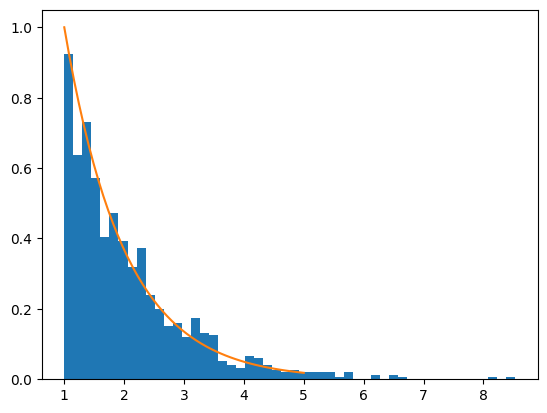

In [30]:
plt.hist(samples, density=True, bins=50)
plt.plot(xs, dist.pdf(xs))

Let's say we want to find out how the mean of a sample of a certain size, say 100, varies. We can simply generate many samples of size 100 from the empirical distribution, and compute the sample mean of each of these samples. 

In [35]:
outcomes = []
subsample_size = 100
for i in range(0, 1000):
    idcs = np.random.randint(0, len(samples), subsample_size)
    sampled = samples[idcs]
    outcomes.append(sum(sampled)/subsample_size)

Plotting the means reveals, that the sample mean varies in the population and its distribution seems to approximate a normal distribution - just as the central limit theorem says.

(array([  5.,  41., 146., 233., 258., 175.,  99.,  32.,   7.,   4.]),
 array([1.75902195, 1.82697774, 1.89493352, 1.96288931, 2.0308451 ,
        2.09880088, 2.16675667, 2.23471246, 2.30266825, 2.37062403,
        2.43857982]),
 <BarContainer object of 10 artists>)

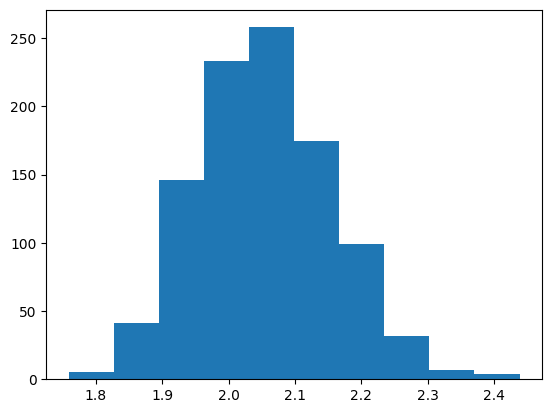

In [37]:
plt.hist(outcomes)

Of course, this last result could have been obtained theoretically using the CLT. However, note that we did not make any assumption about the underlying distribution nor are we limited to the mean as a parameter. We can get such estimates for any statistic we are interested in. 